In [31]:
from glob import glob

#import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from skan import draw
import numpy as np
from skimage import exposure
import skimage
import pandas as pd

# Then import the radial hydride packagess
from HAPPY import import_image
from HAPPY import cropping_functions as crop
from HAPPY import plot_functions as plt_f
from HAPPY import radial_hydride_fraction as RHF
from HAPPY import branching as branch
from HAPPY import crack_path as cp
from HAPPY import image_processing
from HAPPY import threshold

In [7]:
def produce_cropped_image(img_fpath,verbose=False):
    og_img = import_image.image(image_path = img_fpath, transpose = False)
    cropped_image = crop.cropImage(og_img, crop_bottom=50, crop_top=0, crop_left=0, crop_right=0)
    crop1 = cropped_image
    # Input the value of the scale bar in microns
    Scale_Bar_Micron_Value = 100
    #Input how many pixels are in your scale bar
    Pixels_In_Scale_Bar = 165.5
    Scale_Bar_Value_In_Meters = Scale_Bar_Micron_Value*(1e-6)
    scale = Scale_Bar_Value_In_Meters/Pixels_In_Scale_Bar 
    scale_um = scale*1e6
    location = 'lower right'

    cropped_image, crop_threshold = crop.cropping_tube(cropped_image, 
                                                   crop_param = 0.2, size_param = 1000, dilation_param = 10)

    # Plot comparison
    if verbose == True:
        plt_f.plot_comparison(crop1, 'Original image crop', cropped_image, 'Tube crop',scale=scale, 
                           location=location)

    return cropped_image

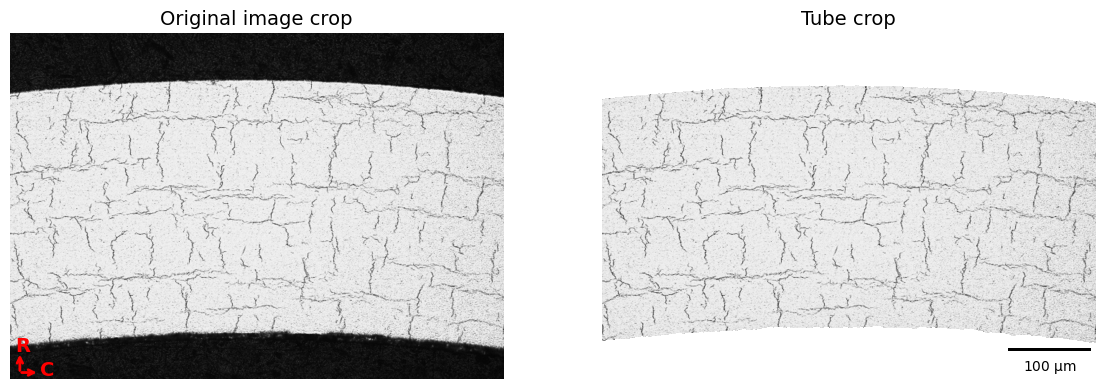

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
produce_cropped_image('data/Micrographs_Used_To_Test_Code/520-6h.png',verbose=True)

## Calculate the following metrics for image charcterisation

* Entropy (use shannon entropy skimage
* Sharpness
* contrast
* Brightness (mean)

In [9]:
def produce_cropped_image(img_fpath,verbose=False):
    og_img = import_image.image(image_path = img_fpath, transpose = False)
    cropped_image = crop.cropImage(og_img, crop_bottom=50, crop_top=0, crop_left=0, crop_right=0)
    crop1 = cropped_image
    # Input the value of the scale bar in microns
    Scale_Bar_Micron_Value = 100
    #Input how many pixels are in your scale bar
    Pixels_In_Scale_Bar = 165.5
    Scale_Bar_Value_In_Meters = Scale_Bar_Micron_Value*(1e-6)
    scale = Scale_Bar_Value_In_Meters/Pixels_In_Scale_Bar 
    scale_um = scale*1e6
    location = 'lower right'

    cropped_image, crop_threshold = crop.cropping_tube(cropped_image, 
                                                   crop_param = 0.2, size_param = 1000, dilation_param = 10)

    # Plot comparison
    if verbose == True:
        plt_f.plot_comparison(crop1, 'Original image crop', cropped_image, 'Tube crop',scale=scale, 
                           location=location)

    return cropped_image

In [10]:
image = io.imread("your_image.png")
gray_image = color.rgb2gray(image)

# Step 2: Apply edge detection (e.g., Sobel filter to detect edges)
edges = filters.sobel(gray_image)

# Step 3: Binarize the image to enhance the ridge structure
binary_image = edges > filters.threshold_otsu(edges)

# Step 4: Apply morphological operations to clean up the ridges (optional but useful)
cleaned_ridges = morphology.binary_closing(binary_image, morphology.disk(2))

# Step 5: Label connected regions (ridges)
labeled_ridges = measure.label(cleaned_ridges)

# Step 6: Measure properties of the ridges
ridge_widths = []
for region in measure.regionprops(labeled_ridges):
    # Measure the equivalent diameter as an approximation of width
    ridge_widths.append(region.equivalent_diameter)

# Calculate the average width of ridges, or any other statistical measure you need
average_width = np.mean(ridge_widths)

NameError: name 'io' is not defined

In [11]:
# Load image and convert to grayscale
img = produce_cropped_image('data/520-5b.png')

# Calculate brightness
brightness = np.mean(img[~np.isnan(img)].flatten())
brightness

#plt.imshow(img)

0.8664118517757456

# Calculate sharpness using Laplacian variance
#laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
ski.filters.laplace(img).var()

In [12]:
# Calculate contrast
contrast = np.std(img[~np.isnan(img)].flatten())

In [13]:
from skimage.measure import shannon_entropy

# Calculate entropy
entropy = shannon_entropy(img)
entropy

6.960670621396244

In [14]:
def produce_metrics(fpath):
    image = produce_cropped_image(fpath)
    
    contrast = np.std(image[~np.isnan(image)].flatten())
    brightness = np.mean(image[~np.isnan(image)].flatten())
    entropy = shannon_entropy(image)

    image_name = fpath.split('/')[-1].split('.')[0]

    return (image_name,contrast,brightness,entropy)


    

    

In [18]:
df = pd.DataFrame([produce_metrics(f) for f in glob('data/Micrographs_Used_To_Test_Code/*')]
             ,columns=('image_name','contrast','brightness','entropy')).sort_values(by='image_name')

In [19]:
df

image_name  contrast  brightness   entropy
9        1805A  0.137405    0.778486  4.747707
2   1805A(236)  0.192948    0.770439  5.085991
6   1805A(238)  0.123692    0.791650  4.920038
3   1806A(293)  0.148463    0.783071  4.850309
8   1807A(428)  0.194752    0.729473  5.312412
10   1810A(16)  0.142553    0.767592  4.798199
7       520-5b  0.146806    0.866412  6.960671
4       520-5m  0.147816    0.839823  7.423125
5       520-6h  0.097853    0.879654  6.873957
1       520-6m  0.191208    0.798319  7.673902
0       520-7b  0.136688    0.843658  7.407484

In [20]:
df.describe()

contrast  brightness    entropy
count  11.000000   11.000000  11.000000
mean    0.150926    0.804416   6.004890
std     0.030588    0.046640   1.237074
min     0.097853    0.729473   4.747707
25%     0.137047    0.774462   4.885173
50%     0.146806    0.791650   5.312412
75%     0.169835    0.841741   7.184077
max     0.194752    0.879654   7.673902

In [36]:
df[df.image_name.str.startswith('1')].describe()

contrast  brightness   entropy
count  6.000000    6.000000  6.000000
mean   0.156635    0.770119  4.952443
std    0.029972    0.021725  0.211944
min    0.123692    0.729473  4.747707
25%    0.138692    0.768304  4.811226
50%    0.145508    0.774462  4.885173
75%    0.181827    0.781925  5.044503
max    0.194752    0.791650  5.312412

In [37]:
df[~df.image_name.str.startswith('1')].describe()

contrast  brightness   entropy
count  5.000000    5.000000  5.000000
mean   0.144074    0.845573  7.267828
std    0.033294    0.031086  0.338377
min    0.097853    0.798319  6.873957
25%    0.136688    0.839823  6.960671
50%    0.146806    0.843658  7.407484
75%    0.147816    0.866412  7.423125
max    0.191208    0.879654  7.673902

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from numpy.fft import fft2, fftshift
import os

# Define the directory containing the images
image_dir = "data/Micrographs_Used_To_Test_Code/*"  # Replace with your directory path
image_files = glob(image_dir)  # Change extension if needed

# Process each image in the directory
for image_path in image_files:  # Limit to first 6 images
    # Step 1: Load and convert the image to grayscale
    gray_image = import_image.image(image_path = image_path, transpose = False)
    #gray_image = color.rgb2gray(image)
    
    # Step 2: Apply Fourier Transform
    f_transform = fft2(gray_image)
    f_transform_shifted = fftshift(f_transform)
    
    # Step 3: Calculate the magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log to scale the values
    
    # Step 4: Visualize the original and magnitude spectrum with titles
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Show the original grayscale image
    ax[0].imshow(gray_image, cmap='gray')
    ax[0].set_title(f"Original Image: {os.path.basename(image_path)}")
    ax[0].axis("off")
    
    # Show the magnitude spectrum (Fourier Transform)
    ax[1].imshow(magnitude_spectrum, cmap='gray')
    ax[1].set_title(f"Fourier Spectrum: {os.path.basename(image_path)}")
    ax[1].axis("off")
    
    plt.show()


TypeError: 'module' object is not callable

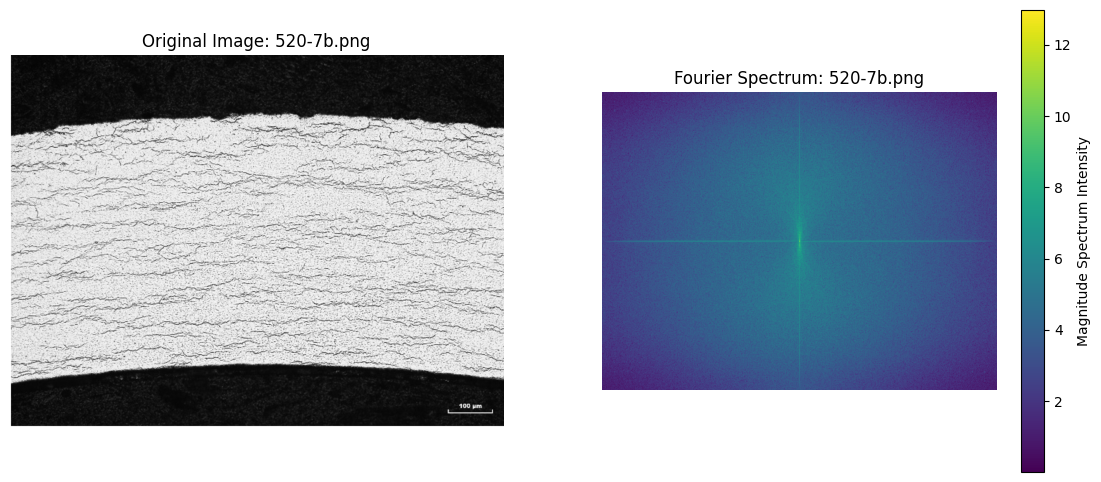

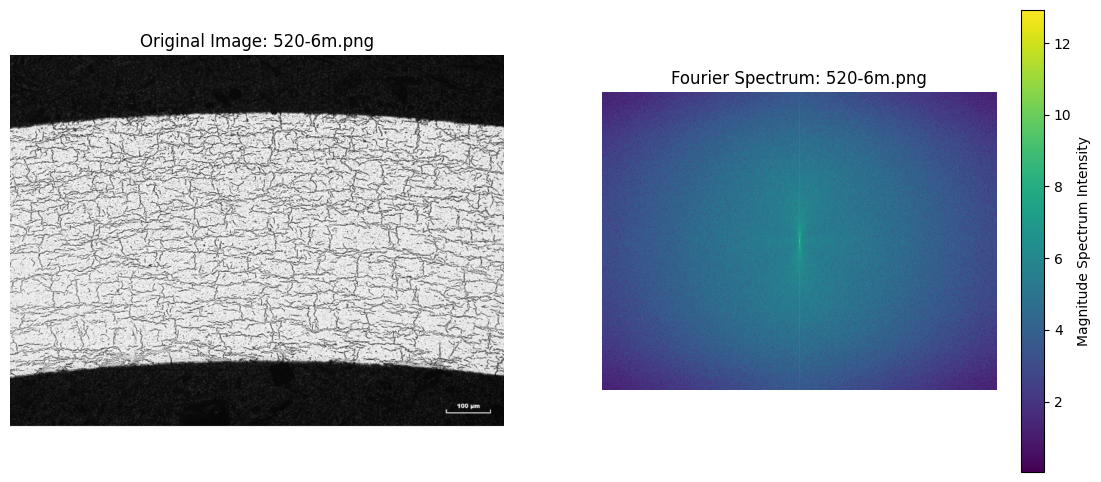

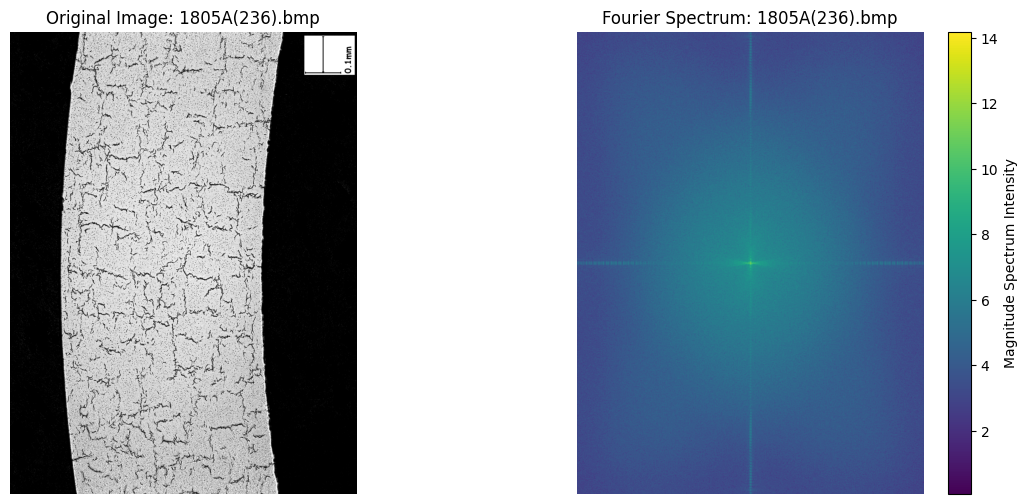

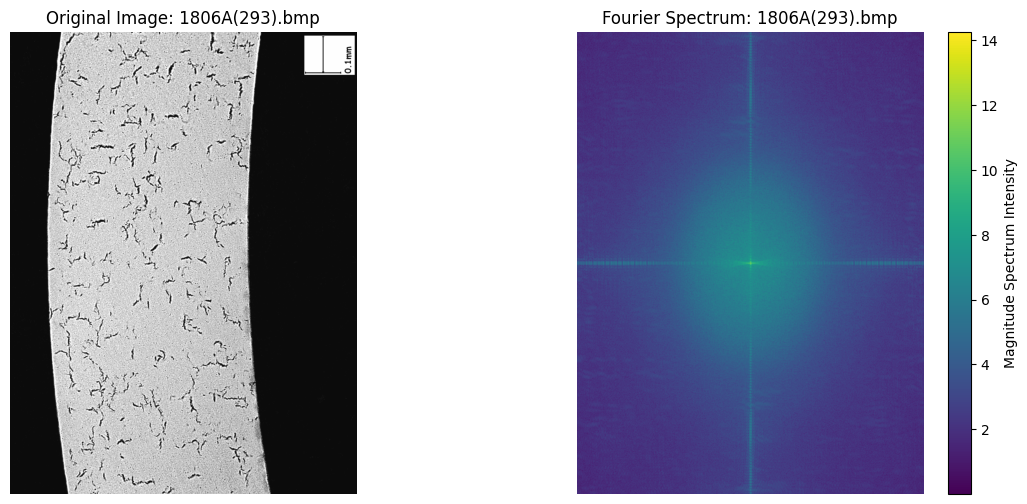

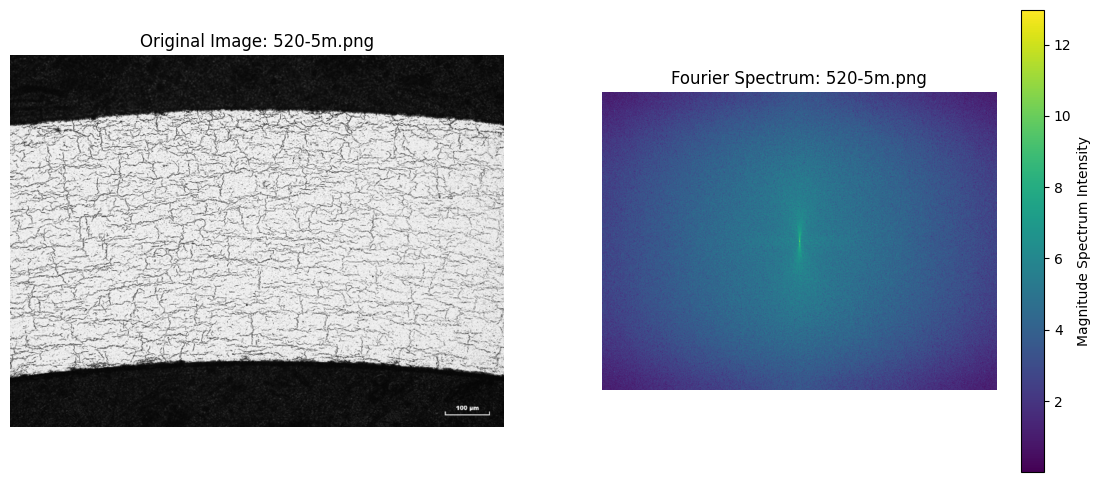

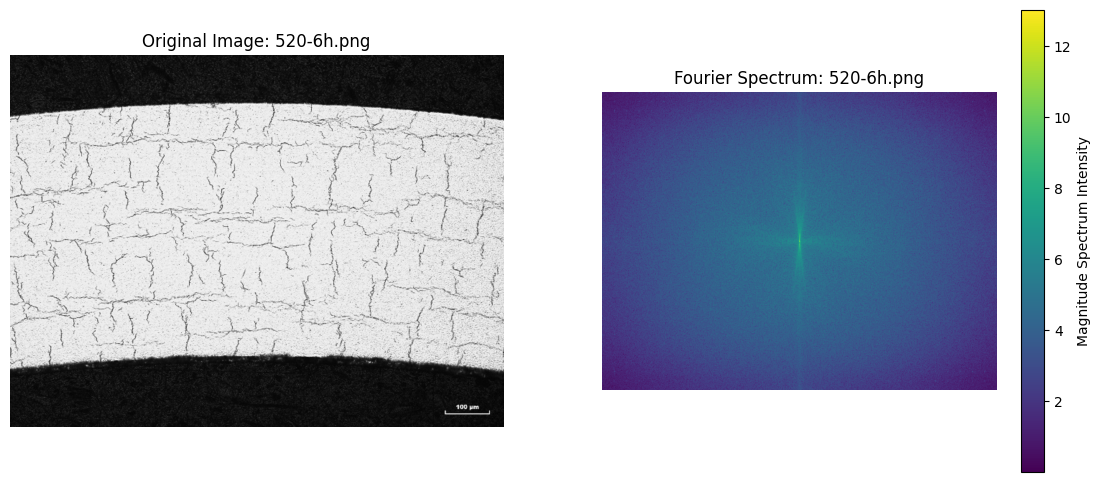

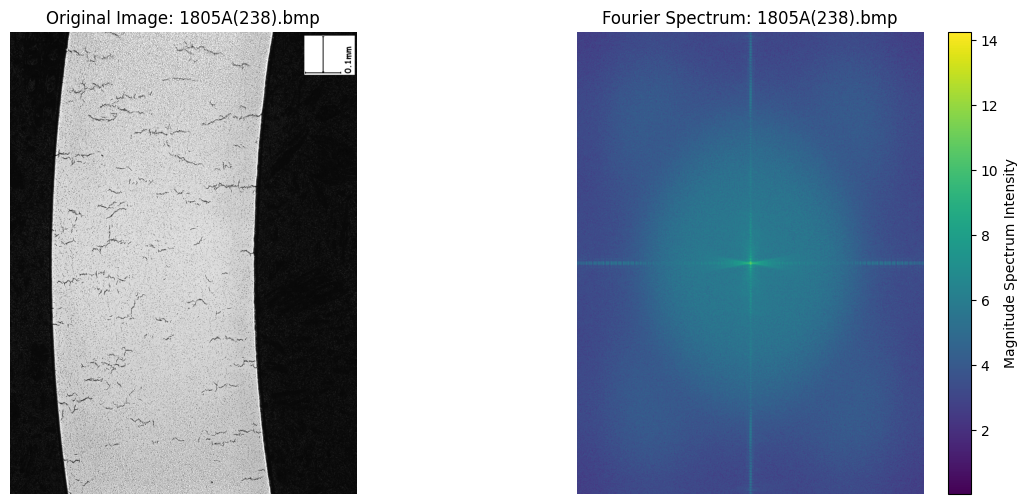

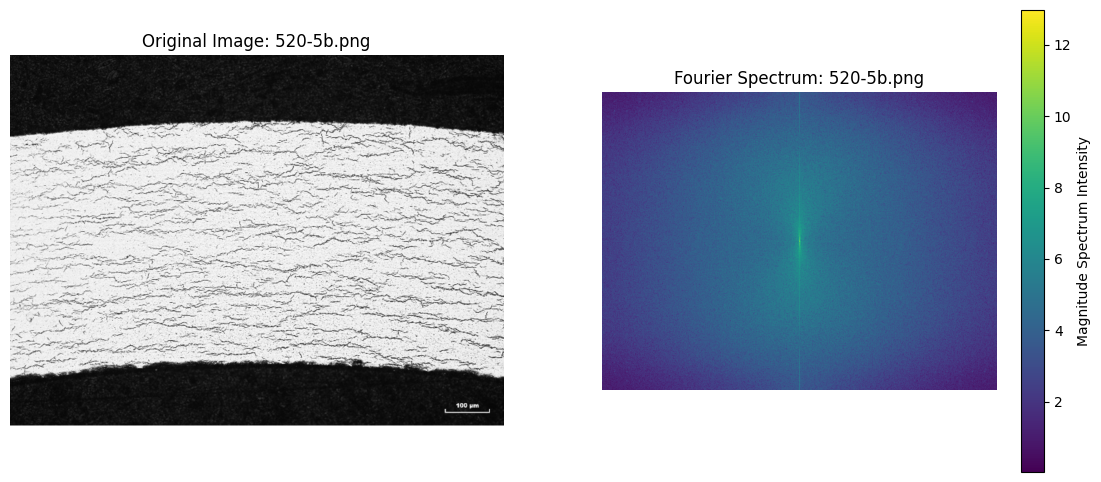

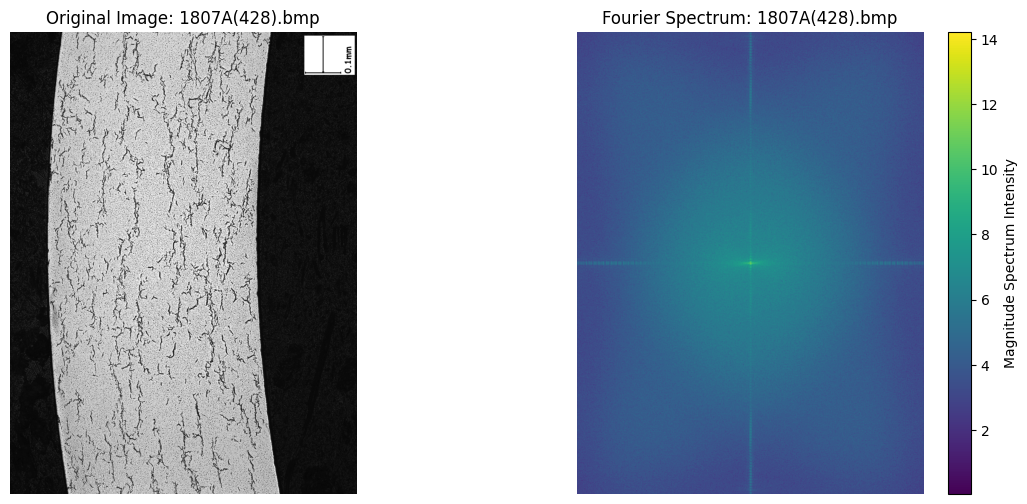

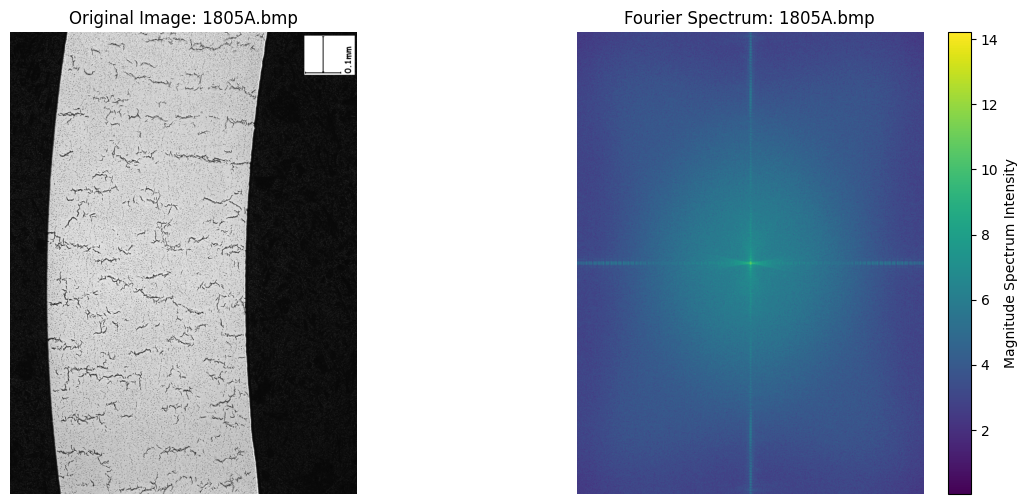

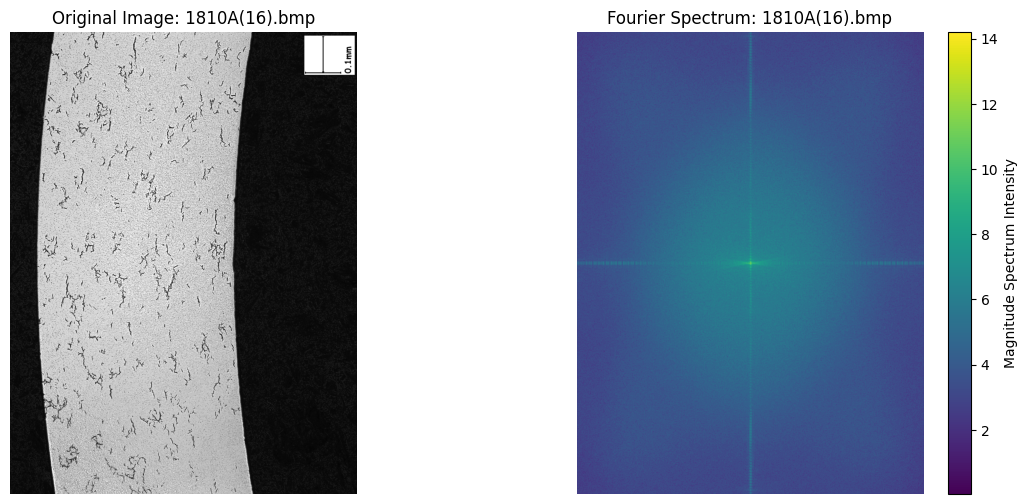

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from numpy.fft import fft2, fftshift
import os

# Define the directory containing the images
image_dir = "data/Micrographs_Used_To_Test_Code/*"  # Replace with your directory path
image_files = glob(image_dir)  # Change extension if needed

# Process each image in the directory
for image_path in image_files:  # Limit to first 6 images
    # Step 1: Load and convert the image to grayscale
    gray_image = import_image.image(image_path = image_path, transpose = False)
    #gray_image = color.rgb2gray(image)
    
    # Step 2: Apply Fourier Transform
    f_transform = fft2(gray_image)
    f_transform_shifted = fftshift(f_transform)
    
    # Step 3: Calculate the magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log to scale the values
    
    # Step 4: Visualize the original and magnitude spectrum with titles and color scale
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Show the original grayscale image
    ax[0].imshow(gray_image, cmap='gray')
    ax[0].set_title(f"Original Image: {os.path.basename(image_path)}")
    ax[0].axis("off")
    
    # Show the magnitude spectrum (Fourier Transform) with color bar
    mag_img = ax[1].imshow(magnitude_spectrum, cmap='viridis')  # or other colormaps like 'plasma' or 'hot'
    ax[1].set_title(f"Fourier Spectrum: {os.path.basename(image_path)}")
    ax[1].axis("off")
    
    # Add a color bar to the Fourier spectrum
    cbar = fig.colorbar(mag_img, ax=ax[1], orientation='vertical')
    cbar.set_label("Magnitude Spectrum Intensity")
    
    plt.show()
